In [28]:
import pandas as pd
import geopandas as gpd
import fiona
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FloatImage
from folium import GeoJsonTooltip
import matplotlib.pyplot as plt
import textwrap

In [29]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [30]:
mbc = gpd.read_file('miami_beach_curfew.kml', driver = 'KML')

In [31]:
mbc

,Name,Description,geometry
0,miami_beach_curfew,,"POLYGON Z ((-80.13063 25.77340 0.00000, -80.12..."


In [32]:
mbc.at[0,'Name']=('Curfew area')

In [33]:
data = {'Name':['Shooting spree on the 800 block of Ocean Drive that hospitalized three people.',\
               'Mango\'s Tropical Cafe',\
               'The Clevelander Bar',\
               'Story Nightclub'],
       'lat':[25.778293270251954,\
             25.779488788858867, ## Mango's
             25.78100360218833, ## The Clevander 
             25.770678948362917], ## Story Nightclub 
       'lon':[-80.13143134480265,
             -80.13121290171135, ## Mango's
             -80.1308607863681, ## The Clevander
             -80.13400121520405]} ## Story Nightclub

df = pd.DataFrame(data)

df

,Name,lat,lon
0,Shooting spree on the 800 block of Ocean Drive...,25.778293,-80.131431
1,Mango's Tropical Cafe,25.779489,-80.131213
2,The Clevelander Bar,25.781004,-80.130861
3,Story Nightclub,25.770679,-80.134001


C:\Users\aefar\AppData\Local\Programs\Python\Python38\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


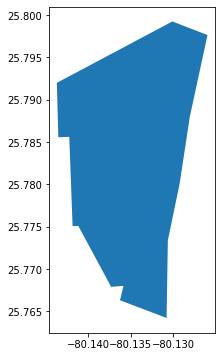

In [34]:
mbc.plot(figsize=(6,6))
plt.show()

In [35]:
m = folium.Map(location=[25.7907,-80.1300], zoom_start=14, tiles='CartoDB positron')

for i, r in mbc.iterrows():
    try:
        sim_geo = gpd.GeoSeries(r['geometry'])
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j)
        folium.Popup(r['Name']).add_to(geo_j)
        geo_j.add_to(m)
    except Exception as e:
        print(e)

for i, r in df.iterrows():
    location = (r['lat'], r['lon'])
    info = (r['Name'])
    info_split = textwrap.wrap(info, 50)
    desc = '<br>'.join(info_split)
    text = f'{desc}'
    folium.Marker(location=location,tooltip=text).add_to(m)

m

In [36]:
m.save('index.html')